In [71]:
# Music Recommendations
"""
Many streaming platform services (Spotify, Netflix, Amazon, youtube, etc.) try to learn your interests or habits and make recommendations on products and services according to it's interpretation of your tendencies. 
You are what you love and you love what you are. Algorithms simply refines that echo chamber to tickle your ego.
Recommendation engines are under the umbrella of AI. Recommender system is one of the techniques in ML.
    In the context of movie recs, the engine predicts the rating a consumer might give to a movie. 
    Then the machine ranks the movies according to how it thinks the consumer might like them.
    Relevancy to the consumer is key. 
    The engine runs on filtering -- content or collaborative. 
    Content filtering is based on other users who are similar to you demographically (age, gender, geogpraphy, etc.). 
    Collaborative filtering is based on your recorded behaviors. 
    It also extrapolates your profile by considering other users who share similar behaviors as you.
    The assumption is you and the other similar profiles probably have high likelihood of overlaps in movie tastes. 
    
Now I'd like to give this a try by pretending i'm Spotify or Apple Music.

Python 3.9.5


"""

"\nMany streaming platform services (Spotify, Netflix, Amazon, youtube, etc.) try to learn your interests or habits and make recommendations on products and services according to it's interpretation of your tendencies. \nYou are what you love and you love what you are. Algorithms simply refines that echo chamber to tickle your ego.\nRecommendation engines are under the umbrella of AI. Recommender system is one of the techniques in ML.\n    In the context of movie recs, the engine predicts the rating a consumer might give to a movie. \n    Then the machine ranks the movies according to how it thinks the consumer might like them.\n    Relevancy to the consumer is key. \n    The engine runs on filtering -- content or collaborative. \n    Content filtering is based on other users who are similar to you demographically (age, gender, geogpraphy, etc.). \n    Collaborative filtering is based on your recorded behaviors. \n    It also extrapolates your profile by considering other users who sha

In [72]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")



"""
Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:
    z = (x - u) / s

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

T-distributed Stochastic Neighbor Embedding. t-SNE [1] is a tool to visualize high-dimensional data. 
    It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. 
    t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

Principal component analysis (PCA).
    Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
    The input data is centered but not scaled for each feature before applying the SVD.

Compute the distance matrix between each pair from a vector array X and Y.
    For efficiency reasons, the euclidean distance between a pair of row vector x and y is computed as:
    dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    This formulation has two advantages over other ways of computing distances. First, it is computationally efficient when dealing with sparse data. 
    Second, if one argument varies but the other remains unchanged, then dot(x, x) and/or dot(y, y) can be pre-computed.

scipy.stats.cdist(array, axis=0) function calculates the distance between each pair of the two collections of inputs.
"""

'\nStandardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:\n    z = (x - u) / s\n\nThe purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. \n\nT-distributed Stochastic Neighbor Embedding. t-SNE [1] is a tool to visualize high-dimensional data. \n    It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. \n    t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.\n\nPrincipal component analysis (PCA).\n    Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. \n    The input data is centered but not scaled for each feature before applying the SVD.\n\nCompute the d

In [73]:
general_data = pd.read_csv(r"C:\Users\ckraft\Downloads\Spotify\General.csv")
genre = pd.read_csv(r"C:\Users\ckraft\Downloads\Spotify\By_Genres.csv")
year = pd.read_csv(r"C:\Users\ckraft\Downloads\Spotify\Year.csv")
artist = pd.read_csv(r"C:\Users\ckraft\Downloads\Spotify\Artists.csv")

In [74]:
print(general_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [75]:
print(genre.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [76]:
print(year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [77]:
print(artist.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB
None


In [78]:
#pip install yellowbrick

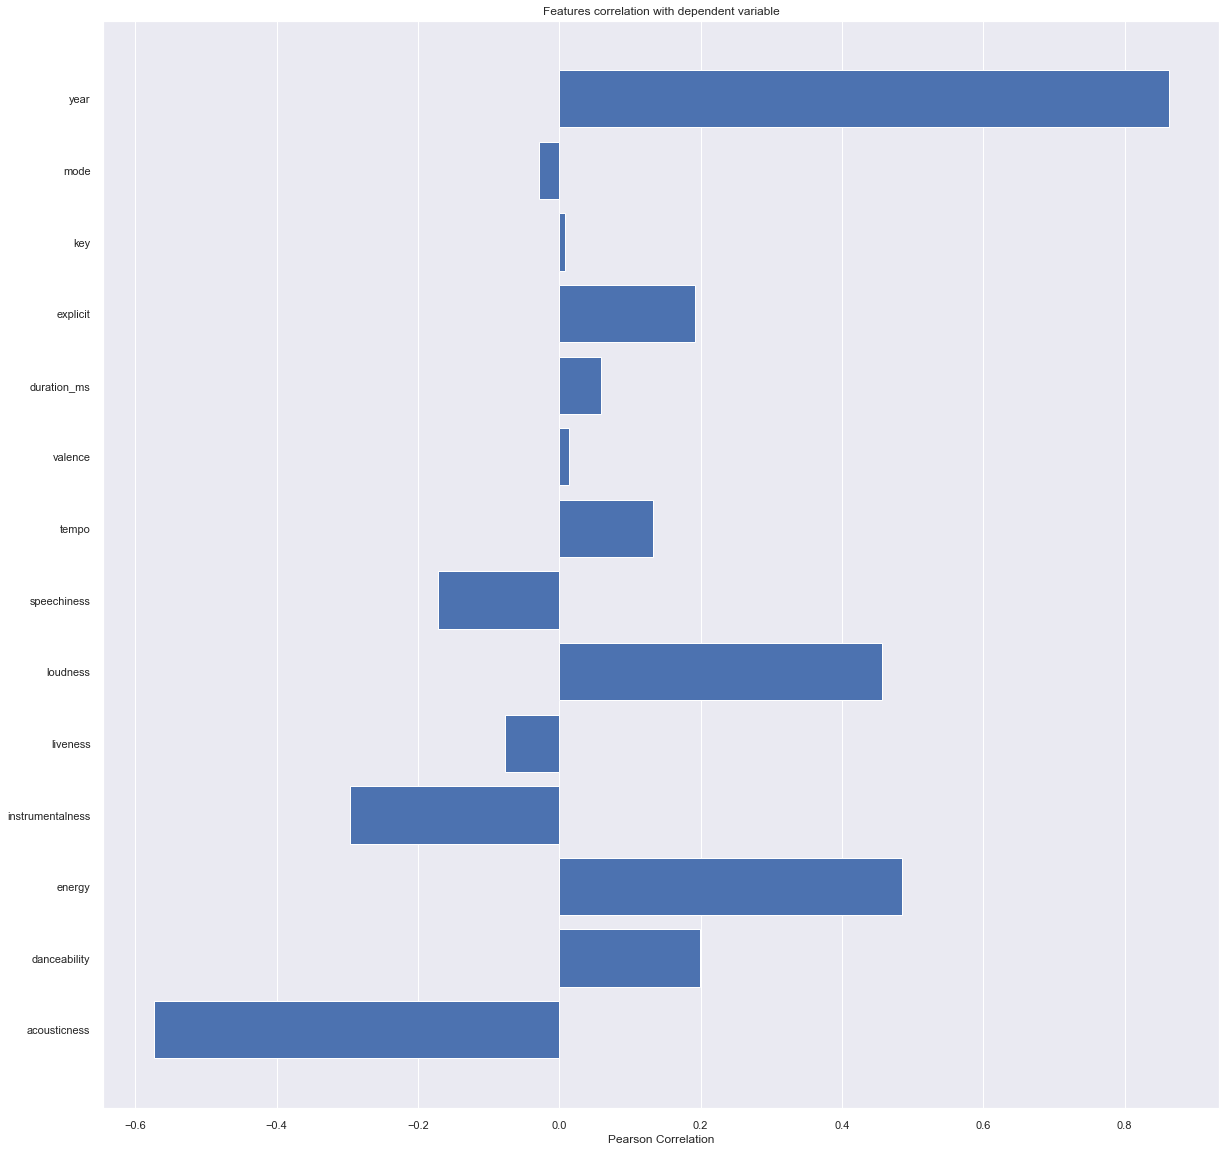

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [79]:
# Popularity - by cheking feature correlation 
import warnings
warnings.simplefilter("ignore")
from yellowbrick.target import FeatureCorrelation #pip install yellowbrick
"""
This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. 
This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.
"""
feature_names = ['acousticness', 
                'danceability', 
                'energy', 
                'instrumentalness',
                'liveness', 
                'loudness', 
                'speechiness', 
                'tempo', 
                'valence',
                'duration_ms',
                'explicit',
                'key',
                'mode',
                'year']

X, y = general_data[feature_names], general_data['popularity']

# place the feature names in an array
features = np.array(feature_names)

# Show me the data!
visualizer = FeatureCorrelation(labels = features)

plt.rcParams['figure.figsize'] = (20,20)
visualizer.fit(X,y) 
visualizer.show()


<AxesSubplot:xlabel='decade', ylabel='count'>

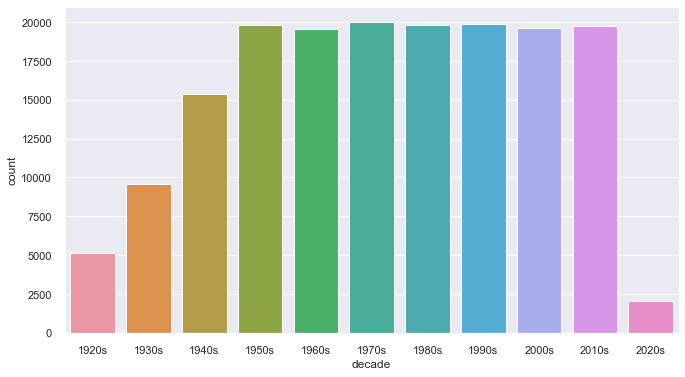

In [80]:
# Music over the years
def get_decade(year):
    period_start = int(year/10)*10
    decade = '{}s'.format(period_start)
    return decade

general_data['decade'] = general_data['year'].apply(get_decade)

sns.set(rc = {'figure.figsize':(11,6)})
sns.countplot(general_data['decade'])

In [81]:
sound_features = ['acousticness', 
                    'danceability', 
                    'energy', 
                    'instrumentalness', 
                    'liveness', 
                    'valence']
fig = px.line(year, x = 'year', y = sound_features)
fig.show()

In [82]:
# Genres and charcteristics

Top10_genres = genre.nlargest(10, 'popularity')

fig = px.bar(Top10_genres, x = 'genres', y = ['valence', 'energy', 'danceability', 'acousticness'], barmode = 'group')
fig.show()

In [83]:
# Clustering genres with K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('kmeans', KMeans(n_clusters = 10))])
X = genre.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre['cluster'] = cluster_pipeline.predict(X)

In [84]:
# Visualizing the genre clustering
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components = 2, verbose = 1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns = ['x', 'y'], data = genre_embedding)
projection['genres'] = genre['genres']
projection['cluster'] = genre['cluster']

fig = px.scatter(
    projection, x = 'x', y = 'y', color = 'cluster', hover_data = ['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.035s...
[t-SNE] Computed neighbors for 2973 samples in 0.952s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.116928
[t-SNE] KL divergence after 1000 iterations: 1.386957


In [85]:
# Clustering songs with K-Means
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                ('kmeans', KMeans(n_clusters = 20, verbose = False))], 
                                verbose = False)

#general_data = pd.read_csv(r"C:\Users\ckraft\Downloads\Spotify\General.csv")

X = general_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
general_data['cluster_label'] = song_cluster_labels

In [86]:
# Visualizing the song clustering
"""
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

general_data = pd.read_csv(r"C:\Users\ckraft\Downloads\Spotify\General.csv")

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns = ['x', 'y'], data = song_embedding)
projection['title'] = general_data['name']
projection['cluster'] = general_data['cluster_label']

fig = px.scatter(
    projection, x = 'x', y = 'y', color = 'cluster', hover_data = ['x', 'y', 'title'])
fig.show()
"""


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 106-107: truncated \UXXXXXXXX escape (Temp/ipykernel_5824/106234084.py, line 17)

In [ ]:
#pip install spotipy

You should consider upgrading via the 'c:\Users\ckraft\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
# Recommendation Machine
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

#Spotify API Docs: https://developer.spotify.com/documentation/web-api/


sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = "my_client_id",
                                                        client_secret = "it's a secret"))

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 
            'year', 
            'acousticness', 
            'danceability', 
            'duration_ms', 
            'energy', 
            'explicit',
            'instrumentalness',
            'key', 
            'liveness', 
            'loudness', 
            'mode', 
            'popularity',
            'speechiness', 
            'tempo']

def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis = 0)

def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict

def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient ='records')

In [ ]:
recommend_songs([{'name': 'Prelude 2', 'year': 2021},
                {'name': 'Sonata for Violin Solo No. 2 in A Minor, BWV 1003:3. Andante', 'year': 2018},
                {'name': 'Minuet in G for Piano', 'year': 2020},
                {'name': 'Symphony No. 7 in C Major, Op. 105', 'year': 2016},
                {'name': 'Intermezzi, Op. 117: 1. In E-Flat Major', 'year': 2005}],  general_data)

[{'name': 'Sphärenklänge, Walzer, Op. 235',
  'year': 2019,
  'artists': "['Josef Strauss', 'Christian Thielemann', 'Wiener Philharmoniker']"},
 {'name': 'Flute Concerto No. 1 in G Major, K. 313: II. Adagio non troppo',
  'year': 1998,
  'artists': "['Wolfgang Amadeus Mozart', 'Anton Gisler', 'Werner Tripp', 'Wiener Philharmoniker', 'Karl Böhm']"},
 {'name': 'Andante spianato et Grande polonaise brillante, Op. 22: Grande Polonaise in E-flat Major. Molto allegro',
  'year': 1995,
  'artists': "['Frédéric Chopin', 'Janusz Olejniczak', 'Tadeusz Strugala', 'The Warsaw Philharmonic National Orchestra of Poland']"},
 {'name': "Variations On A Theme From Pachelbel's Canon In D Major",
  'year': 1991,
  'artists': "['David Lanz']"},
 {'name': 'String Quartet No. 8 in E Minor, Op. 59, No. 2 "Rasumovsky": III. Allegretto (Arranged by Barry Lieberman)',
  'year': 2011,
  'artists': "['Ludwig van Beethoven', 'The American String Project']"},
 {'name': 'Piano Concerto No. 24 in C Minor, K. 491: II.